# Uso de este cuaderno

Al ejecutar el cuaderno entero se parará la ejecución al terminar el procesamiento de los datos. Una vez hecho, se elige el modelo que se quiera ejecutar.  
En la sección "Carga de datos" de este mismo cuaderno se pueden obtener las variables necesarias para no tener que ejecutar la sección de procesamiento (la carga se hace desde un archivo .pkl que tiene que estar en la misma carpeta que este cuaderno), esto facilita el uso en cuanto a tiempo.   


Cada modelo está guardado en su respectivo archivo .pkl(su ubicación tiene que ser la misma que este cuaderno jupiter) el cual ya esta entrenado, esto sirve para no tener que ejecutar otra vez el entrenamiento de los modelos. La carga de cada modelo se puede encontrar en su correspondiente sección.  
Por ejempo, para ejecutar un modelo de regresión logística hay que ejecutar la celda de Importaciones, luego cargar los datos (sección "Carga de datos") y tras esto ejecutar la celda de Selección de variables (se elige qué se va a meter en el modelo: metricas, textos, titulos o una combinación de los anteriores), luego ir a Modelos Machine learning, buscar la sección Regresión logística y ejecutar la sección de "Guardado y carga del modelo" y "predicción y evaluación".  
Resumen de ejecución del ejemplo:
* Importaciones
* Carga de datos
* Selección de variables
* Guardado y carga del modelo
* Predicción y evaluación

# Preprocesamiento de los datos

## Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score

from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TextVectorization, Input, Embedding, Flatten, Concatenate,MultiHeadAttention, LayerNormalization, Dense, Dropout, Add, Concatenate

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

import joblib
import pickle
# import spacy



from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


# RANDOM SEED o RANDOM STATE
##### Se establece una semilla para que la separación de grupo de train test y el resultado de los modelos den siempre el mismo resultado #####

# Se usa RandomState de numpy pues un random.seed() no funciona con los modelos. Información obtenida de la siguiente fuente https://stackoverflow.com/questions/40750394/how-to-seed-the-random-number-generator-for-scikit-learn
from numpy.random import RandomState
RandomState(42)

# Se usa el parámetro random_state de los modelos en vez de RandomState de numpy
# En la redes neuronales sí se usa

RandomState(MT19937) at 0x7B8741AD1740

## Carga y comprobación de los datos

In [2]:
df_noticias = pd.read_csv("Noticias_sin_duplicados.csv", sep='|')
print(df_noticias.shape)
df_noticias.head(3)

(6010, 19)


,id_noticia,cont_titulo,cont_texto,compartir_tiempo,real_fake,autor,fuente,visitas,compartir,duracion,favorito,pais,idioma,tiempo,tipo,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",2022-09-13 23:00:00,FAKE,Marcus Liu,The Daily Dispatch,389073,55938,599,8008,United States,English,2022-09-05 01:00:00,Crónica,0,False,324000,1094400
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,2022-09-19 17:00:00,FAKE,Lily Wang,Insider Insights,239160,34348,216,7958,Bangladesh,English,2022-09-15 18:00:00,Reseña,0,False,1249200,1591200
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,2022-10-04 11:00:00,REAL,Nora Patel,Daily Beacon,48853,43056,447,8145,Tanzania,English,2022-09-17 21:00:00,Columna,1,True,2865600,1432800


In [3]:
df_noticias[df_noticias['cont_titulo'].isna()]

,id_noticia,cont_titulo,cont_texto,compartir_tiempo,real_fake,autor,fuente,visitas,compartir,duracion,favorito,pais,idioma,tiempo,tipo,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode


In [4]:
df_noticias['real_fake'].value_counts()

,count
real_fake,
FAKE,3025
REAL,2985


In [5]:
print(df_noticias.columns.to_list())

['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo', 'real_fake', 'autor', 'fuente', 'visitas', 'compartir', 'duracion', 'favorito', 'pais', 'idioma', 'tiempo', 'tipo', 'real_fake_integer', 'real_fake_bool', 'tiempo_encode', 'tiempo_comparticion_encode']


In [6]:
# df_noticias.drop(columns=['anio_publicacion', 'mes_publicacion', 'dia_publicacion','hora_publicacion', 'anio_comparticion', 'mes_comparticion','dia_comparticion', 'hora_comparticion','real_fake_bool'], inplace=True)

In [7]:
print(df_noticias.columns.to_list())

['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo', 'real_fake', 'autor', 'fuente', 'visitas', 'compartir', 'duracion', 'favorito', 'pais', 'idioma', 'tiempo', 'tipo', 'real_fake_integer', 'real_fake_bool', 'tiempo_encode', 'tiempo_comparticion_encode']


In [8]:
# # Tarda bastante, se deja comentado para agilizar la preparación de los datos
# plt.figure(figsize=(20,20))
# sns.pairplot(df_noticias, hue='real_fake_integer', palette='mako')
# plt.show()

### Correlación

In [9]:
# Correlación con id_noticia
df_noticias.corr(numeric_only=True)

,id_noticia,visitas,compartir,duracion,favorito,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode
id_noticia,1.000000,-0.004810,-0.010709,-0.016337,-0.004766,-0.862088,-0.862088,-0.004703,-0.023188
visitas,-0.004810,1.000000,-0.001347,-0.010323,0.006439,0.008029,0.008029,-0.001556,0.000958
compartir,-0.010709,-0.001347,1.000000,0.017280,0.022178,0.013152,0.013152,-0.003509,0.002398
duracion,-0.016337,-0.010323,0.017280,1.000000,-0.002232,0.004921,0.004921,-0.000445,-0.010203
favorito,-0.004766,0.006439,0.022178,-0.002232,1.000000,0.004949,0.004949,-0.007724,0.017665
real_fake_integer,-0.862088,0.008029,0.013152,0.004921,0.004949,1.000000,1.000000,0.006395,0.019254
real_fake_bool,-0.862088,0.008029,0.013152,0.004921,0.004949,1.000000,1.000000,0.006395,0.019254
tiempo_encode,-0.004703,-0.001556,-0.003509,-0.000445,-0.007724,0.006395,0.006395,1.000000,0.030005
tiempo_comparticion_encode,-0.023188,0.000958,0.002398,-0.010203,0.017665,0.019254,0.019254,0.030005,1.000000


No se mete id_noticias en los modelos pues no tiene sentido, además desvirtua mucho los resultados porque esta muy correlado con la variable objetivo (real_fake)

In [10]:
df_noticias[['real_fake', 'real_fake_integer']].head()

,real_fake,real_fake_integer
0,FAKE,0
1,FAKE,0
2,REAL,1
3,FAKE,0
4,REAL,1


In [11]:
corr = df_noticias.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,id_noticia,visitas,compartir,duracion,favorito,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode
id_noticia,1.000000,-0.004810,-0.010709,-0.016337,-0.004766,-0.862088,-0.862088,-0.004703,-0.023188
visitas,-0.004810,1.000000,-0.001347,-0.010323,0.006439,0.008029,0.008029,-0.001556,0.000958
compartir,-0.010709,-0.001347,1.000000,0.017280,0.022178,0.013152,0.013152,-0.003509,0.002398
duracion,-0.016337,-0.010323,0.017280,1.000000,-0.002232,0.004921,0.004921,-0.000445,-0.010203
favorito,-0.004766,0.006439,0.022178,-0.002232,1.000000,0.004949,0.004949,-0.007724,0.017665
real_fake_integer,-0.862088,0.008029,0.013152,0.004921,0.004949,1.000000,1.000000,0.006395,0.019254
real_fake_bool,-0.862088,0.008029,0.013152,0.004921,0.004949,1.000000,1.000000,0.006395,0.019254
tiempo_encode,-0.004703,-0.001556,-0.003509,-0.000445,-0.007724,0.006395,0.006395,1.000000,0.030005
tiempo_comparticion_encode,-0.023188,0.000958,0.002398,-0.010203,0.017665,0.019254,0.019254,0.030005,1.000000


## Codificación  
Df codificado con métricas, fechas luego se añaden las variables categóricas con One Hot encoder y los textos se tokenizan, variable objetivo se deja fuera en un array.   
Cuantas más variables se metan en los modelos, más tiempo se tarda en entrenar.

In [12]:
lb = LabelBinarizer()

# Se crea df_codificado vacío
df_codificado = pd.DataFrame()


# Textos
df_codificado['cont_texto'] = df_noticias['cont_texto']
df_codificado['cont_titulo'] = df_noticias['cont_titulo']


# Métricas
df_codificado['visitas'] = df_noticias['visitas']
df_codificado['compartir'] = df_noticias['compartir']
df_codificado['duracion'] = df_noticias['duracion']
df_codificado['favorito'] = df_noticias['favorito']
df_codificado['tiempo_encode'] = df_noticias['tiempo_encode']
df_codificado['tiempo_comparticion_encode'] = df_noticias['tiempo_comparticion_encode']


# Variable objetivo
y = pd.DataFrame(lb.fit_transform(df_noticias['real_fake']), columns=['real_fake'])

print(f"Tipo de dato de y : {type(y)}")
# print(df_codificado.shape)
# print(df_codificado.columns)
display(df_codificado.head(3))
display(y)

Tipo de dato de y : <class 'pandas.core.frame.DataFrame'>


,cont_texto,cont_titulo,visitas,compartir,duracion,favorito,tiempo_encode,tiempo_comparticion_encode
0,"Daniel Greenfield, a Shillman Journalism Fello...",You Can Smell Hillary’s Fear,389073,55938,599,8008,324000,1094400
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,Watch The Exact Moment Paul Ryan Committed Pol...,239160,34348,216,7958,1249200,1591200
2,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy,48853,43056,447,8145,2865600,1432800


,real_fake
0,0
1,0
2,1
3,0
4,1
...,...
6005,1
6006,0
6007,0
6008,1


In [13]:
# One Hot Encoding para variables categóricas
ohe = OneHotEncoder()


# Autor
X_autor = df_noticias['autor'].values.reshape(-1, 1)
ohe_autor = ohe.fit_transform(X_autor).toarray()

# Fuente
X_fuente = df_noticias['fuente'].values.reshape(-1, 1)
ohe_fuente = ohe.fit_transform(X_fuente).toarray()

# Pais
X_pais = df_noticias['pais'].values.reshape(-1, 1)
ohe_pais = ohe.fit_transform(X_pais).toarray()

# Idioma
X_idioma = df_noticias['idioma'].values.reshape(-1, 1)
ohe_idioma = ohe.fit_transform(X_idioma).toarray()

# Tipo
X_tipo = df_noticias['tipo'].values.reshape(-1, 1)
ohe_tipo = ohe.fit_transform(X_tipo).toarray()



########### Unir los ohe al df_codificado ############

df_autor = pd.DataFrame(ohe_autor, columns=df_noticias['autor'].unique())
df_codificado = pd.concat([df_codificado,df_autor], axis=1)

df_fuente = pd.DataFrame(ohe_fuente, columns=df_noticias['fuente'].unique())
df_codificado = pd.concat([df_codificado,df_fuente], axis=1)

df_pais = pd.DataFrame(ohe_pais, columns=df_noticias['pais'].unique())
df_codificado = pd.concat([df_codificado,df_pais], axis=1)

df_idioma = pd.DataFrame(ohe_idioma, columns=df_noticias['idioma'].unique())
df_codificado = pd.concat([df_codificado,df_idioma], axis=1)

df_tipo = pd.DataFrame(ohe_tipo, columns=df_noticias['tipo'].unique())
df_codificado = pd.concat([df_codificado,df_tipo], axis=1)

print(df_codificado.shape)
display(df_codificado.head(3))

(6010, 134)


,cont_texto,cont_titulo,visitas,compartir,duracion,favorito,tiempo_encode,tiempo_comparticion_encode,Marcus Liu,Lily Wang,...,Entrevista exclusiva,Noticia internacional,Columna de humor,Carta al editor,Entrevista,Artículo de investigación,Entrevista en profundidad,Reportaje,Crítica,Reportaje especial
0,"Daniel Greenfield, a Shillman Journalism Fello...",You Can Smell Hillary’s Fear,389073,55938,599,8008,324000,1094400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,Watch The Exact Moment Paul Ryan Committed Pol...,239160,34348,216,7958,1249200,1591200,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy,48853,43056,447,8145,2865600,1432800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Separación de los datos en grupo de train y test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_codificado, y, test_size=.15, random_state=32)


print(type(X_train))
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print()
print("X_test",X_test.shape)
print("y_test",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X_train (5108, 134)
y_train (5108, 1)

X_test (902, 134)
y_test (902, 1)


In [15]:
X_train.head(3)

,cont_texto,cont_titulo,visitas,compartir,duracion,favorito,tiempo_encode,tiempo_comparticion_encode,Marcus Liu,Lily Wang,...,Entrevista exclusiva,Noticia internacional,Columna de humor,Carta al editor,Entrevista,Artículo de investigación,Entrevista en profundidad,Reportaje,Crítica,Reportaje especial
4678,The Ohio Republican will travel to Israel this...,Boehner: Israel trip planned before Netanyahu-...,196089,37372,182,5019,543600,3193200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,Leaked email shows Monsanto Executive V.P. inv...,Leaked email shows Monsanto Executive V.P. inv...,737213,8115,68,4893,3103200,3423600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1655,Speaking at a brief news conference in Des Moi...,Hillary Clinton Responds To New FBI Investigation,770636,41448,325,4662,3301200,1303200,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Comprobación balance variable objetivo
print(y_train.value_counts())
print(y_test.value_counts())

real_fake
0            2565
1            2543
Name: count, dtype: int64
real_fake
0            460
1            442
Name: count, dtype: int64


## Comprobación de longitud de palabras y vocabulario

### Textos

In [17]:
###### Comprobación de la longtud maxima y vocabulario de los textos en 'cont_texto' de X_train ######

vectorize_layer_textos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode='int'
)
vectorize_layer_textos.adapt(X_train['cont_texto'].values)
textos_tokenizados = vectorize_layer_textos(X_train['cont_texto'].values)


longitud_maxima_textos = textos_tokenizados.shape[1]
max_features_textos = vectorize_layer_textos.vocabulary_size()
vocabulario_textos = vectorize_layer_textos.get_vocabulary()

print(textos_tokenizados.shape)
print(textos_tokenizados)

print(f"Longitud de palabras máxima {longitud_maxima_textos}")
print(f"Cantidad palabras en el vocabulario {max_features_textos}")


## Comprobación de las palabras que han sido tokenizadas

# for i, text in enumerate(df_prueba['cont_texto']):
#     # print(f"Texto original: {text}")
#     token_ids = textos_tokenizados[i].numpy()
#     tokens = [vocab[token_id] for token_id in token_ids if token_id < len(vocab)]
#     print(f"Palabras tokenizadas: {tokens}\n")

(5108, 20847)
tf.Tensor(
[[   2  675   92 ...    0    0    0]
 [2318  223  641 ...    0    0    0]
 [ 771   25    6 ...    0    0    0]
 ...
 [ 683   80   36 ...    0    0    0]
 [ 562 1218 2794 ...    0    0    0]
 [  48  215   21 ...    0    0    0]], shape=(5108, 20847), dtype=int64)
Longitud de palabras máxima 20847
Cantidad palabras en el vocabulario 95779


In [18]:
# Una forma de contar las palabras por registro
numero_palabras = np.count_nonzero(textos_tokenizados, axis = 1)
print(numero_palabras)
print()

# Otra frma de contar la cantidad de palabras en cada secuencia tokenizada
df = pd.DataFrame()

longitudes_textos = tf.reduce_sum(tf.cast(textos_tokenizados > 0, tf.int32), axis=1)
df['cantidad_palabras_textos'] = longitudes_textos.numpy()
print(df['cantidad_palabras_textos'])
print(len(longitudes_textos))

[ 327  895   27 ...  366  365 1343]

0        327
1        895
2         27
3       1068
4        609
        ... 
5103     186
5104     186
5105     366
5106     365
5107    1343
Name: cantidad_palabras_textos, Length: 5108, dtype: int32
5108


Mediana: 627.0
Media 795.2637039937354


<Axes: >

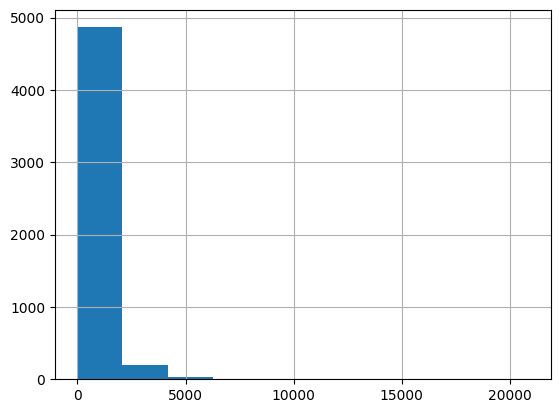

In [19]:
print("Mediana:",df['cantidad_palabras_textos'].median())
print("Media",df['cantidad_palabras_textos'].mean())
df['cantidad_palabras_textos'].hist()

In [20]:
# Se crea sequence_legth
# Comprobación del balance de ese % de registros con mayor cantidad de palabras que el quantil 80

cuantil = 0.75
sequence_length_textos = int(df['cantidad_palabras_textos'].quantile(cuantil))
print(f"Valor del cuantil {cuantil}: {sequence_length_textos}")

# Se crea una columna con la cantidad de palabras de la columna cont_texto que hay en cada registro
df_noticias['cantidad_palabras_textos'] = df['cantidad_palabras_textos']

# Se filtra ese % de registros que tienen mayor cantidad de palabras
registros_mayor_cantidad_palabras = df_noticias[df_noticias['cantidad_palabras_textos'] > sequence_length_textos]

print(f"{len(registros_mayor_cantidad_palabras)} registros que se va a cortar su longitud")
display(registros_mayor_cantidad_palabras.groupby('real_fake').agg({'id_noticia':'count'}))

# Por último, se elimina la columna de apoyo, ya no hace falta
df_noticias.drop(columns='cantidad_palabras_textos', inplace=True)

Valor del cuantil 0.75: 1032
1274 registros que se va a cortar su longitud


,id_noticia
real_fake,
FAKE,628
REAL,646


In [21]:
comprobacion = X_train['cont_titulo'].str.isnumeric()
print(comprobacion.shape)
comprobacion.value_counts()

(5108,)


,count
cont_titulo,
False,5108


### Titulos

In [22]:
###### Comprobación de la longtud maxima y vocabulario de los textos en 'cont_texto' de X_train ######

vectorize_layer_titulos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode='int'
)
vectorize_layer_titulos.adapt(X_train['cont_titulo'].values)
titulos_tokenizados = vectorize_layer_textos(X_train['cont_titulo'].values)


longitud_maxima_titulo = titulos_tokenizados.shape[1]
max_features_titulos = vectorize_layer_titulos.vocabulary_size()
vocabulario_titulos = vectorize_layer_titulos.get_vocabulary()


print(titulos_tokenizados.shape)
# print(titulos_tokenizados)

print(f"Longitud de palabras máxima {longitud_maxima_titulo}")
print(f"Cantidad palabras en el vocabulario {max_features_titulos}")
# print(f"Vocabulario de los titulos: {vocabulario_titulo}")



## Comprobación de las palabras que han sido tokenizadas

# for i, text in enumerate(df_prueba['cont_titulo']):
#     # print(f"Texto original: {text}")
#     token_ids = textos_tokenizados[i].numpy()
#     tokens = [vocab[token_id] for token_id in token_ids if token_id < len(vocab)]
#     print(f"Palabras tokenizadas: {tokens}\n")

(5108, 53)
Longitud de palabras máxima 53
Cantidad palabras en el vocabulario 10435


In [23]:
# Una forma de contar las palabras por registro
numero_palabras = np.count_nonzero(titulos_tokenizados, axis = 1)
print(numero_palabras)
print()

# Otra frma de contar la cantidad de palabras en cada secuencia tokenizada
df = pd.DataFrame()

longitudes_titulos = tf.reduce_sum(tf.cast(titulos_tokenizados > 0, tf.int32), axis=1)
df['cantidad_palabras_titulos'] = longitudes_titulos.numpy()
print(df['cantidad_palabras_titulos'])
print(len(longitudes_titulos))

[ 7 20  7 ... 12 14 19]

0        7
1       20
2        7
3       15
4        7
        ..
5103     8
5104     9
5105    12
5106    14
5107    19
Name: cantidad_palabras_titulos, Length: 5108, dtype: int32
5108


Mediana: 10.0
Media 10.538566953797964


<Axes: >

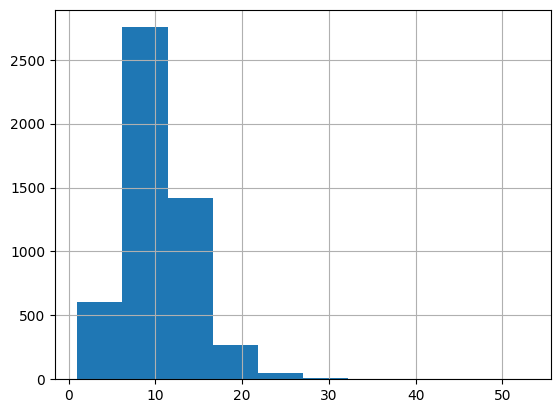

In [24]:
print("Mediana:",df['cantidad_palabras_titulos'].median())
print("Media",df['cantidad_palabras_titulos'].mean())
df['cantidad_palabras_titulos'].hist()

In [25]:
# Comprobación del balance de ese % de registros con mayor cantidad de palabras que el quantil especificado

cuantil = 1
sequence_length_titulos = int(df['cantidad_palabras_titulos'].quantile(cuantil))
print(f"Valor del cuantil {cuantil}: {sequence_length_titulos}")

# Se crea una columna con la cantidad de palabras de la columna cont_texto que hay en cada registro
df_noticias['cantidad_palabras_titulos'] = df['cantidad_palabras_titulos']

# Se filtra ese % de registros que tienen mayor cantidad de palabras
registros_mayor_cantidad_palabras_titulos = df_noticias[df_noticias['cantidad_palabras_titulos'] > sequence_length_titulos]

print(f"{len(registros_mayor_cantidad_palabras_titulos)} registros que se recorta su longitud")
display(registros_mayor_cantidad_palabras_titulos.groupby('real_fake').agg({'id_noticia':'count'}))

# Por último, se elimina la columna de apoyo, ya no hace falta
df_noticias.drop(columns='cantidad_palabras_titulos', inplace=True)

Valor del cuantil 1: 53
0 registros que se recorta su longitud


,id_noticia
real_fake,


## Tokenización

### Textos

In [26]:
# Tokenización
vectorize_layer_textos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=max_features_textos,
    output_mode="int",
    output_sequence_length=sequence_length_textos,
)
vectorize_layer_textos.adapt(X_train['cont_texto'])


X_train_texto = vectorize_layer_textos(X_train['cont_texto'])
X_test_texto = vectorize_layer_textos(X_test['cont_texto'])


print(f"max_features {max_features_textos}")
print(f"sequence_length {sequence_length_textos}")

X_train_texto

max_features 95779
sequence_length 1032


<tf.Tensor: shape=(5108, 1032), dtype=int64, numpy=
array([[   2,  675,   92, ...,    0,    0,    0],
       [2318,  223,  641, ...,    0,    0,    0],
       [ 771,   25,    6, ...,    0,    0,    0],
       ...,
       [ 683,   80,   36, ...,    0,    0,    0],
       [ 562, 1218, 2794, ...,    0,    0,    0],
       [  48,  215,   21, ...,   55, 1679,   11]])>

### Titulos

In [27]:
# Tokenización
vectorize_layer_textos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=max_features_titulos,
    output_mode="int",
    output_sequence_length=sequence_length_titulos,
)
vectorize_layer_textos.adapt(X_train['cont_titulo'])


X_train_titulo = vectorize_layer_textos(X_train['cont_titulo'])
X_test_titulo = vectorize_layer_textos(X_test['cont_titulo'])


print(f"max_features {max_features_titulos}")
print(f"sequence_length {sequence_length_titulos}")

X_train_titulo

max_features 10435
sequence_length 53


<tf.Tensor: shape=(5108, 53), dtype=int64, numpy=
array([[ 391,  302,  968, ...,    0,    0,    0],
       [ 483,   87,  336, ...,    0,    0,    0],
       [  13,   12, 1510, ...,    0,    0,    0],
       ...,
       [ 135,   12,  763, ...,    0,    0,    0],
       [7359,  920,  256, ...,    0,    0,    0],
       [  25,  272,  111, ...,    0,    0,    0]])>

In [28]:
X_train_titulo_comprobacion = pd.DataFrame(X_train_titulo)
X_train_titulo_comprobacion.isna().sum().sum()

0

## Metricas

In [29]:
# Se eliminan las columna 'cont_texto' y 'cont_titulo' que eran necesarias en el proceso de tokeniación
X_train_metricas = X_train.drop(columns=['cont_texto', 'cont_titulo'])
X_test_metricas = X_test.drop(columns=['cont_texto', 'cont_titulo'])
# X_train_metricas.columns.tolist()

## Normalización

In [30]:
# Normalización
min_max_scaler = MinMaxScaler()
scaler = RobustScaler()
s_scaler = StandardScaler()

# Recordar solo normalizar datos de entrada, la salida se quiere predecir sin normalizar

X_train_metricas = scaler.fit_transform(X_train_metricas)
X_test_metricas = scaler.transform(X_test_metricas)

X_train_texto = scaler.fit_transform(X_train_texto )
X_test_texto = scaler.transform(X_test_texto )

X_train_titulo = scaler.fit_transform(X_train_titulo )
X_test_titulo = scaler.transform(X_test_titulo )

# Al normalizar, convierte los dataframe en arrays de numpy
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [31]:
print(y_train)
y_train = (y_train.values).ravel()
y_train

      real_fake
4678          1
967           0
1655          0
2638          0
3344          1
...         ...
4030          1
2940          0
1334          1
1579          0
2775          1

[5108 rows x 1 columns]


array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
# Exception personalizada para evitar ejecutar el cuaderno entero
raise Exception("Carga y preparación de datos terminada. Ahora elige modelo a ejecutar")

Exception: Carga y preparación de datos terminada. Ahora elige modelo a ejecutar

# Guardado de los datos preprocesados

Para no tener que ejecutar de nuevo todo el preprocesamiento o preparación de los datos.

In [32]:
# Crear un diccionario con todos los objetos
datos_preprocesados = {
    'max_features_textos':max_features_textos,
    'sequence_length_textos':sequence_length_textos,
    'max_features_titulos':max_features_titulos,
    'sequence_length_titulos':sequence_length_titulos,
    'X_train_metricas':X_train_metricas,
    'X_test_metricas':X_test_metricas,
    'X_train_texto':X_train_texto,
    'X_test_texto':X_test_texto,
    'X_train_titulo':X_train_titulo,
    'X_test_titulo':X_test_titulo,
    'y_train':y_train,
    'y_test':y_test
}

# Guardar el diccionario
with open('datos_preprocesados.pkl', 'wb') as f:
    joblib.dump(datos_preprocesados, f, compress=9) # Se usa compress para que comprima los datos lo que se traduce en un mayor tiempo de carga pero libera mucho espacio, 9 es el mayor nivel de compresion.

# Carga de datos preprocesados

In [33]:
# Cargar el diccionario de preprocesamiento
with open('datos_preprocesados.pkl', 'rb') as f:
    datos_preprocesados = joblib.load(f)

# Esructura de los datos
print(f"Claves del diccionario datos_preprocesados: {datos_preprocesados.keys()}\n")

# Recuperar los objetos
max_features_textos = datos_preprocesados['max_features_textos']
sequence_length_textos = datos_preprocesados['sequence_length_textos']
max_features_titulos = datos_preprocesados['max_features_titulos']
sequence_length_titulos = datos_preprocesados['sequence_length_titulos']

X_train_metricas = datos_preprocesados['X_train_metricas']
X_test_metricas = datos_preprocesados['X_test_metricas']

X_train_texto = datos_preprocesados['X_train_texto']
X_test_texto = datos_preprocesados['X_test_texto']

X_train_titulo = datos_preprocesados['X_train_titulo']
X_test_titulo = datos_preprocesados['X_test_titulo']

y_train = datos_preprocesados['y_train']
y_test = datos_preprocesados['y_test']

Claves del diccionario datos_preprocesados: dict_keys(['max_features_textos', 'sequence_length_textos', 'max_features_titulos', 'sequence_length_titulos', 'X_train_metricas', 'X_test_metricas', 'X_train_texto', 'X_test_texto', 'X_train_titulo', 'X_test_titulo', 'y_train', 'y_test'])



In [7]:
# Comprobación dimensiones
print(type(X_train_texto))
print("X_train_metricas",X_train_metricas.shape)
print("X_test_metricas", X_test_metricas.shape)
print()
print("X_train_texto",X_train_texto.shape)
print("X_test_texto",X_test_texto.shape)
print()
print("X_train_titulo",X_train_titulo.shape)
print("X_test_titulo",X_test_titulo.shape)
# display(X_train)

<class 'tensorflow.python.framework.ops.EagerTensor'>
X_train_metricas (5108, 132)
X_test_metricas (902, 132)

X_train_texto (5108, 1032)
X_test_texto (902, 1032)

X_train_titulo (5108, 53)
X_test_titulo (902, 53)


# Selección de variables


In [34]:
# Creación de listas donde se guardaran los valores de la precisión, TNR y recall de cada modelo
lista_precisiones=[]
lista_tnr=[]
lista_recall=[]


# # # Titulos, textos y metricas
X_train_titulo_texto_metricas = np.hstack([X_train_metricas, X_train_texto, X_train_titulo])
X_test_titulo_texto_metricas = np.hstack([X_test_metricas,X_test_texto, X_test_titulo])

# # # Textos
# Ya existe X_train_texto

# # # Titulos
# Ya existen X_train_titulo

# # # Metricas
# Ya existe X_train_metricas

# # # Titulos y textos
X_train_titulo_texto = np.hstack([X_train_texto, X_train_titulo])
X_test_titulo_texto = np.hstack([X_test_texto, X_test_titulo])

# # Titulos y metricas
X_train_titulo_metricas = np.hstack([X_train_titulo, X_train_metricas])
X_test_titulos_metricas = np.hstack([X_test_titulo, X_test_metricas])

# # Textos y metricas
X_train_texto_metricas = np.hstack([X_train_texto, X_train_metricas])
X_test_texto_metricas = np.hstack([X_test_texto, X_test_metricas])


# Modelos Machine Learning

## Embedding

### Textos

In [ ]:
embedding_dim = 32

In [426]:
# Crear la entrada del modelo
input_text = Input(shape=(sequence_length_textos,))  # Entrada basada en las secuencias tokenizadas. Cantidad de columnas que tienen los textos tokenizados.

# Añadir la capa de Embedding
embedding = Embedding(input_dim=max_features_textos, output_dim=embedding_dim, input_length=sequence_length_textos, mask_zero=True)(input_text)

# Aplanar la salida de la capa de Embedding
# flatten = Flatten()(embedding) # Funciona mejor globar average pooling 1d
# Tambien se puede hacer con Globar average pooling1d
global_avg_pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding)

# Crear el modelo
embedding_model = Model(inputs=input_text, outputs=global_avg_pooling_layer)

X_train_texto = embedding_model(X_train_texto)
X_test_texto = embedding_model(X_test_texto)


### Titulos

In [ ]:
# Crear la entrada del modelo
input_text = Input(shape=(sequence_length_titulos,))  # Entrada basada en las secuencias tokenizadas. Cantidad de columnas que tienen los textos tokenizados.

# Añadir la capa de Embedding
embedding = Embedding(input_dim=max_features_titulos, output_dim=embedding_dim, input_length=sequence_length_titulos)(input_text) # Se quita el parámetro mask_zero=True porque genera secuencias con nulos al encontrar titulos que se han tokenizado como solo 0

# Aplanar la salida de la capa de Embedding
# flatten = Flatten()(embedding) # Funciona mejor globar average pooling 1d
# Tambien se puede hacer con Globar average pooling1d
global_avg_pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding)

# Crear el modelo
embedding_model = Model(inputs=input_text, outputs=global_avg_pooling_layer)

X_train_titulo = embedding_model(X_train_titulo)
X_test_titulo = embedding_model(X_test_titulo)

## Regresión logística con todos los datos

### Entrenamiento Regresión logísica

In [ ]:
# Tarda  min con embedding de textos y el resto de metricas

# Semilla establecida usando random_state de numpy, lo que permite que cada ejecución del código muestre el mismo resultado cada vez. random.seed() no funciona en los modelos.
# RandomState(42)


tuned_parameters = {
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty':['l2'], # 'l1''l2', 'elasticnet' Se quitan estas penalizaciones pues entran en conflicto con algunos solver
}
nfolds = 5

reg_log = GridSearchCV(LogisticRegression(random_state=42), param_grid = tuned_parameters, cv = nfolds, return_train_score=True) #, error_score='raise'



# Entrenamiento con textos y métricas
reg_log.fit(X_train_titulo_texto_metricas, y_train)


# Obtención del modelo (no se usa pues printea muchas variables, tantas como columnas en el dataframe)
# b0 = reg_log.intercept_
# betas = reg_log.coef_

# print("Y = ", end='')
# for i in range(len(X_train.columns)):
#     print(f"{np.round(reg_log.coef_[0][i],3)} {X_train.columns[i]}", end=' + ')
# print(np.round(reg_log.intercept_[0],2))
print(reg_log.best_params_)

Aparece <font color='red'>ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty</font> aunque se ejecuta normalmente. Este error se debe a que el solver lbfgs no es compatible con la penalización l1 por ello se escoge la penalización L2 que es compatible con todos los solvers.  
Varios solver son incompatibles con ciertas penalizaciones.

### Guardado  y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(reg_log, 'reg_log_model.pkl')

['reg_log_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
reg_log = joblib.load('reg_log_model.pkl')

### Predicción y evaluación

In [ ]:
# Se calcula las predicciones con el grupo de train y con el de test
y_est = reg_log.predict(X_test)
y_est_train = reg_log.predict(X_train)



MAE_train = mean_absolute_error(y_train, y_est_train)
MSE_train = mean_squared_error(y_train, y_est_train)
accuracy_train = reg_log.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)


MAE = mean_absolute_error(y_test, y_est)
MSE = mean_squared_error(y_test, y_est)
accuracy = reg_log.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr_test = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr_test)
recall_test = recall_score(y_test, y_est)
lista_recall.append(recall_test)



print("----- TRAIN -----")
print(f"Error absoluto medio: {MAE_train}")
print(f"Error cuadrático medio: {MSE_train}")
print(f"PRECISIÓN: {accuracy_train}")
print(f"TNR: {tnr_train}")
print(f"RECALL: {recall_train}")

print()

print("----- TEST -----")
print(f"Error absoluto medio: {MAE}")
print(f"Error cuadrático medio: {MSE}")
print(f"PRECISIÓN: {accuracy}")
print(f"TNR: {tnr_test}")
print(f"RECALL: {recall_test}")

----- TRAIN -----
Error absoluto medio: 0.23941307578008916
Error cuadrático medio: 0.23941307578008916
PRECISIÓN: 0.7605869242199108
TNR: 0.7035250463821893
RECALL: 0.8177761249535144

----- TEST -----
Error absoluto medio: 0.2733964248159832
Error cuadrático medio: 0.2733964248159832
PRECISIÓN: 0.7266035751840169
TNR: 0.6140724946695096
RECALL: 0.8360995850622407


COMPROBAR RANDOM_STATE = 42 (Conclusión, el parámetro random_state funciona, devuelve el mismo resultado cada ejecución)  


### Matriz confusión

Confusion matrix
[[288 181]
 [ 79 403]]
Normalized confusion matrix
[[0.61407249 0.38592751]
 [0.16390041 0.83609959]]


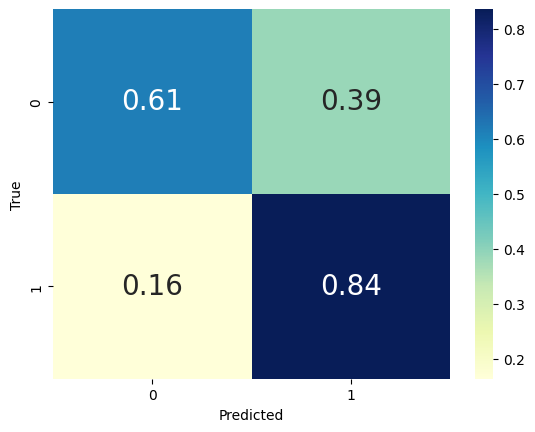

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.7795786921940387


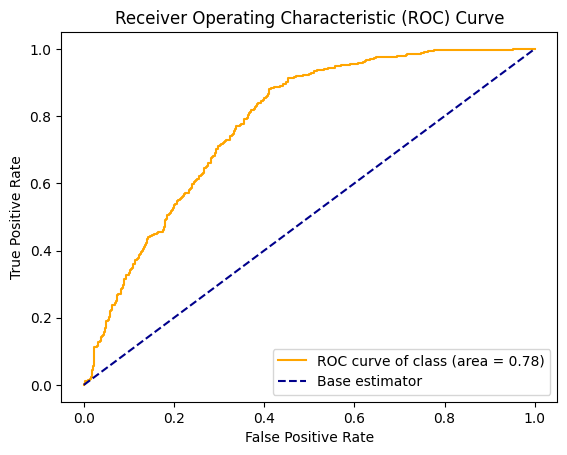

In [ ]:
# Gráfico de área bajo la curva AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, reg_log.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

## KNNeighbors

### Buscando los k vecinos óptimos

For K = 100, train accuracy is 63.87% and test accuracy is 62.88%


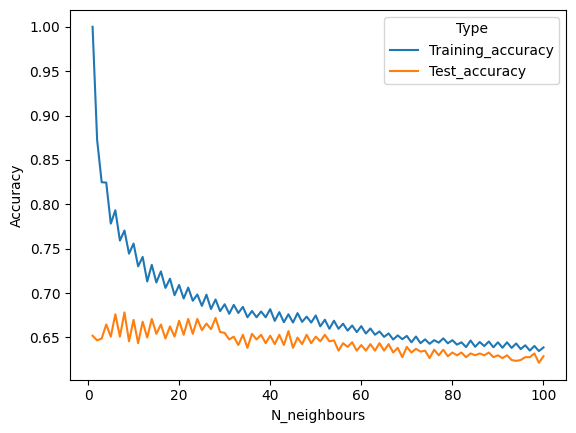

In [ ]:
# Tarda 2min 52s

K_max=100
rang_K = np.arange(1, K_max+1)
accs = pd.DataFrame(columns=["Neighbors","Training Accuracy", "Test Accuracy"])
accs_list = list()

for n_neighbors in rang_K:
    # Crear el modelo y entrenarlo
    knnModel_iter = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # Obtener la precision para el conjunto de datos de entrenamiento y testeo
    acc_tr = knnModel_iter.score(X_train, y_train)
    acc_test = knnModel_iter.score(X_test, y_test)

    accs_list.append([n_neighbors, acc_tr,acc_test])

accs=pd.DataFrame(accs_list, columns=['N_neighbours','Training_accuracy','Test_accuracy'])

print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
        % (n_neighbors, 100*acc_tr, 100*acc_test))


# Mostremos la evolución de la precision
melted_accs = accs.melt('N_neighbours', var_name="Type", value_name="Accuracy")
g = sns.lineplot(x="N_neighbours", y="Accuracy", hue='Type', data=melted_accs)

In [ ]:
# # Df donde se almacena la información de todas las iteraciones
# melted_accs

### Entrenamiento de KNeighborsClassifier

In [ ]:
# Tarda 4 min
# KNeighborsClassifier no tiene parámetro random_state así que se usa RandomState de numpy
RandomState(42)

k_max = 70 # Número aproximado obtenido de la comprobación de los k vecimos óptimos anteriormente realizada
k_min = 20 # Número aproximado obtenido de la comprobación de los k vecimos óptimos anteriormente realizada
rang_K = np.arange(20, k_max+1, 5)
tuned_parameters = {
    'n_neighbors': rang_K}
nfold = 5


# Se define el modelo de clasificacion kNN
knnModel_CV = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=nfold, return_train_score=True).fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
knnModel_CV.best_params_

{'n_neighbors': 20}

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(knnModel_CV, 'knnModel_CV_model.pkl')

['knnModel_CV_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
knnModel_CV = joblib.load('knnModel_CV_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = knnModel_CV.predict(X_test)

MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = knnModel_CV.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = knnModel_CV.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = knnModel_CV.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)


# Se puede obtener el mejor parametro asi
K_CV = knnModel_CV.best_params_['n_neighbors']


# Se muestran los resultados
print('Selected value of k: ' + str(K_CV))
print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Selected value of k: 20
----- TRAIN -----
MSE : 0.2908618127786033
MAE : 0.2908618127786033
Accuracy: 0.7091381872213968
Specificity: 0.5179962894248609
Recall 0.9007065823726292
----- TEST -----
MSE : 0.3312302839116719
MAE : 0.3312302839116719
Accuracy: 0.668769716088328
Specificity: 0.4562899786780384
Recall 0.8755186721991701


Con embedding_dim 16, sequence_length cuantil 50 pooling, random_state=42
Selected value of k: 33  
----- TRAIN -----  
MSE : 0.26801634472511143  
MAE : 0.26801634472511143  
Accuracy: 0.7319836552748885  
Specificity: 0.7194852941176471  
Recall 0.7447447447447447  
----- TEST -----  
MSE : 0.29232386961093587  
MAE : 0.29232386961093587  
Accuracy: 0.7076761303890642  
Specificity: 0.7027027027027027   
Recall 0.7120315581854043  

SOLO CON TEXTOS TOKENIZADOS  
MSE : 0.4468980021030494  
MAE : 0.4468980021030494  
Accuracy: 0.5531019978969506  
Specificity: 0.7363834422657952  
Recall 0.3821138211382114  
Selected value of k: 1  

Con embedding reducido con Pooling average, con RandomState(0) Tarda 2min   
MSE : 0.288117770767613  
MAE : 0.288117770767613  
Accuracy: 0.711882229232387  
Specificity: 0.7197452229299363  
Recall 0.7041666666666667  
Selected value of k: 18  

### Matriz de confusión

Confusion matrix
[[214 255]
 [ 60 422]]
Normalized confusion matrix
[[0.45628998 0.54371002]
 [0.12448133 0.87551867]]


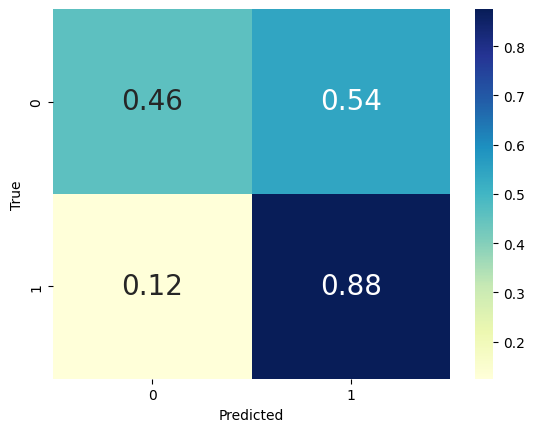

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### Curva ROC

AUC:  0.7646466835944759


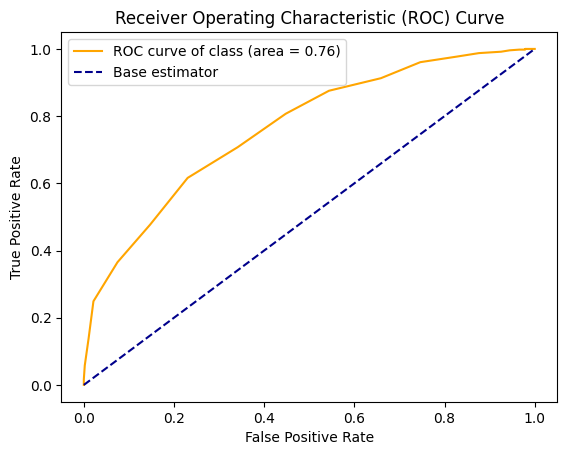

In [ ]:
# Ejecutame, me vas a necesitar
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, knnModel_CV.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

## Support Vector Machine  
Con SGDClassifier

### Entrenamiento de Support Vector Machine

In [ ]:
# Tarda 3 min

# Se calcula GridSearchCV para un support vector machine con los parámetros óptimos
# RandomState(42) # se usa random_state de los parámetros de los modelos


epsilon_rang = np.logspace(-3,1,3)
eta0_rang = np.logspace(-3,1,3)
alpha_rang = np.logspace(-3,1,3)

tuned_parameters = [{
    'alpha':alpha_rang,
    'eta0':eta0_rang,
    'epsilon':epsilon_rang,
    'loss':['hinge','squared_hinge'], # Ambos de SVM si se elige una perdida diferente ya no estamos hablando de support vector machine si no de otro tipo de modelos
    'penalty':['l2']
}]

svm_GS = GridSearchCV(SGDClassifier(random_state=42),tuned_parameters, cv=5, error_score='raise').fit(X_train, y_train)


### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(svm_GS, 'svm_GS_model.pkl')

['svm_GS_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
svm_GS = joblib.load('svm_GS_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = svm_GS.predict(X_test)

MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = svm_GS.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = svm_GS.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = svm_GS.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {svm_GS.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión{svm_GS.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'alpha': 0.1, 'epsilon': 0.001, 'eta0': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
Mejor precisión0.7349570091780485
----- TRAIN -----
MSE : 0.2527860326894502
MAE : 0.2527860326894502
Accuracy: 0.7472139673105498
Specificity: 0.6601113172541744
Recall 0.8345109706210487
----- TEST -----
MSE : 0.2733964248159832
MAE : 0.2733964248159832
Accuracy: 0.7266035751840169
Specificity: 0.5906183368869936
Recall 0.8589211618257261


SOLO CON TEXTOS TOKENIZADOS  
Parámetros óptimos {'alpha': 10.0, 'epsilon': 0.001, 'eta0': 10.0, 'loss': 'hinge', 'penalty': 'l2'}  
0.614967743939692  
Precisión 0.6256572029442692  
True Negative Rate 0.5729847494553377  
Recall 0.6747967479674797  

### Matriz de confusión

Confusion matrix
[[277 192]
 [ 68 414]]
Normalized confusion matrix
[[0.59061834 0.40938166]
 [0.14107884 0.85892116]]


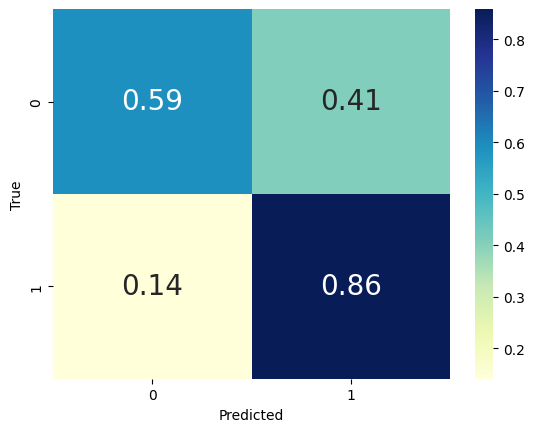

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.7247697493563598


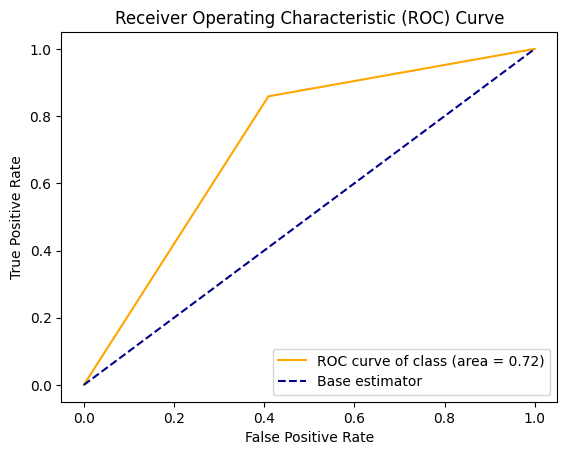

In [ ]:
# Ejecutame, me vas a necesitar
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, svm_GS.predict(X_test))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

AttributeError: probability estimates are not available for loss='hinge'

## Árbol de decisión

In [ ]:
# Qué parámetros probar en min_samples_leaf y min_samples_split, fuente https://stackoverflow.com/questions/67532613/how-to-define-min-sample-split-and-min-sample-leaf-in-decision-tree-regresso

PRUEBAS DE AJUSTE DE PARÁMETROS DEL MODELO

<b>min_samples_split= np.logspace(-2,-1,4)  
in_samples_leaf= np.logspace(-2,-1,4) </b>

Mejores parámetros {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 0.021544346900318832, 'min_samples_split': 0.01}  
Accuracy de train 0.7696879643387816  
Accuracy de test 0.7318611987381703  
Error cuadrático medio 0.26813880126182965  
Error absoluto medio 0.26813880126182965  
True Negative Rate de entrenamiento 0.844411437059042  
True Negative Rate de Test 0.6709129511677282  

<b>Se ajustan los parametros a buscar  
min_samples_split = np.logspace(-3,-2,4)  
min_samples_leaf = np.linspace(0.01, 0.03, 4)  </b>

Mejores parámetros {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 0.016666666666666666,   'min_samples_split': 0.001}  
Accuracy de train 0.774517087667162  
Accuracy de test 0.7287066246056783  
Error cuadrático medio 0.27129337539432175  
Error absoluto medio 0.27129337539432175  
True Negative Rate de entrenamiento 0.844411437059042  
True Negative Rate de Test 0.6857749469214437    

<b>Se vuelve a ajustar los parametros  
mins_samples_split = np.linspace(0.0007,0.0017,4)    
rang_samples = np.linspace(0.01, 0.03, 4)
</b>

### Entrenamiendo de árbol de decisión

In [ ]:
# Búsqueda de los mejores parámetros
# Tarda 5 min
# RandomState(0) # En su lugar se usa random_state en los parámetros del modelo

# max_depth cuanto menor sea, menos sobreaprende el árbol de decisión
# np.logspace(-3,-1,4)
# np.linspace(0.01, 0.03, 4)
rang_split = np.logspace(-3,-2,4)
rang_samples = np.logspace(-3,-1,4)
rang_depth = np.arange(3,7)
tuned_parameters=[{'criterion':['gini','entropy','log_loss'],
                    'max_depth':rang_depth,
                    'min_samples_leaf':rang_samples,
                    'min_samples_split':rang_split
                    }]
nfolds=5

tree_CV = GridSearchCV(DecisionTreeClassifier(random_state=42), tuned_parameters, cv=nfolds,error_score='raise').fit(X_train, y_train)
# No se usa return_train_score=False por motivos de optimización del tiempo de ejecución


In [ ]:
tree_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.01}

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(tree_CV, 'tree_CV_model.pkl')

['tree_CV_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
tree_CV = joblib.load('tree_CV_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = tree_CV.predict(X_test)

MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = tree_CV.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = tree_CV.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = tree_CV.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {tree_CV.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión{tree_CV.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01}
Mejor precisión0.7221384611667407
----- TRAIN -----
MSE : 0.2486998514115899
MAE : 0.2486998514115899
Accuracy: 0.7513001485884101
Specificity: 0.5896103896103896
Recall 0.9133506879880997
----- TEST -----
MSE : 0.2733964248159832
MAE : 0.2733964248159832
Accuracy: 0.7266035751840169
Specificity: 0.5671641791044776
Recall 0.8817427385892116


Con la separación de train y test hecha regular
Parámetros óptimos {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 0.03, 'min_samples_split': 0.001}  
Mejor precisión0.745726460324528  
----- TRAIN -----  
MSE : 0.24034175334323923  
MAE : 0.24034175334323923  
Accuracy: 0.7596582466567607  
Specificity: 0.7341911764705882  
Recall 0.7856606606606606  
----- TEST -----  
MSE : 0.24290220820189273   
MAE : 0.24290220820189273  
Accuracy: 0.7570977917981072  
Specificity: 0.7252252252252253  
Recall 0.7850098619329389  

EJECUCIÓN ANTERIOR  
Mejores parámetros {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 0.02333333333333333, 'min_samples_split': 0.001}  
Accuracy de train 0.7414561664190193  
Accuracy de test 0.7160883280757098  
Error cuadrático medio 0.28391167192429023  
Error absoluto medio 0.28391167192429023  
True Negative Rate de entrenamiento 0.7367837338262477  
True Negative Rate de Test 0.616557734204793   

In [ ]:
# tree_CV.cv_results_['params']

In [ ]:
# print(tree_CV.cv_results_.keys())

### Matriz de confusión

Confusion matrix
[[266 203]
 [ 57 425]]
Normalized confusion matrix
[[0.56716418 0.43283582]
 [0.11825726 0.88174274]]


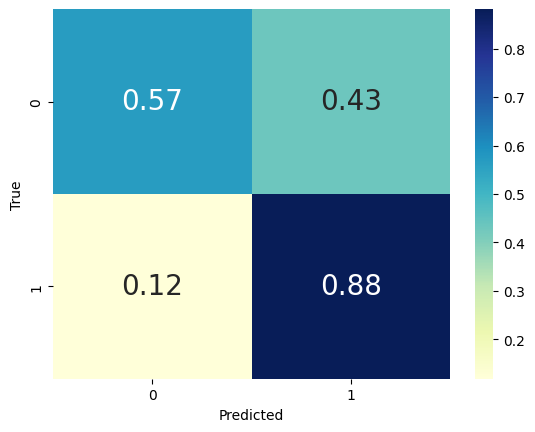

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

Salida anteriores  
Confusion matrix  
[[323 148]  
 [110 370]]  
Normalized confusion matrix  
[[0.68577495 0.31422505]  
 [0.22916667 0.77083333]]  

### AUC

AUC:  0.760189862778579


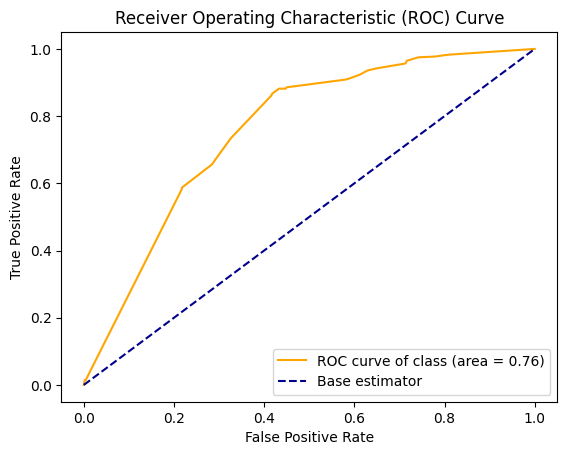

In [ ]:
# Ejecutame, me vas a necesitar
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,tree_CV.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
# # Para ver la variable que tiene más importancia en el modelo
# # Este código funciona cuando los datos de entrada estan en formato DataFrame

# indice = pd.DataFrame(tree.feature_importances_).idxmax()
# X_train.columns[indice]

### Plot_tree

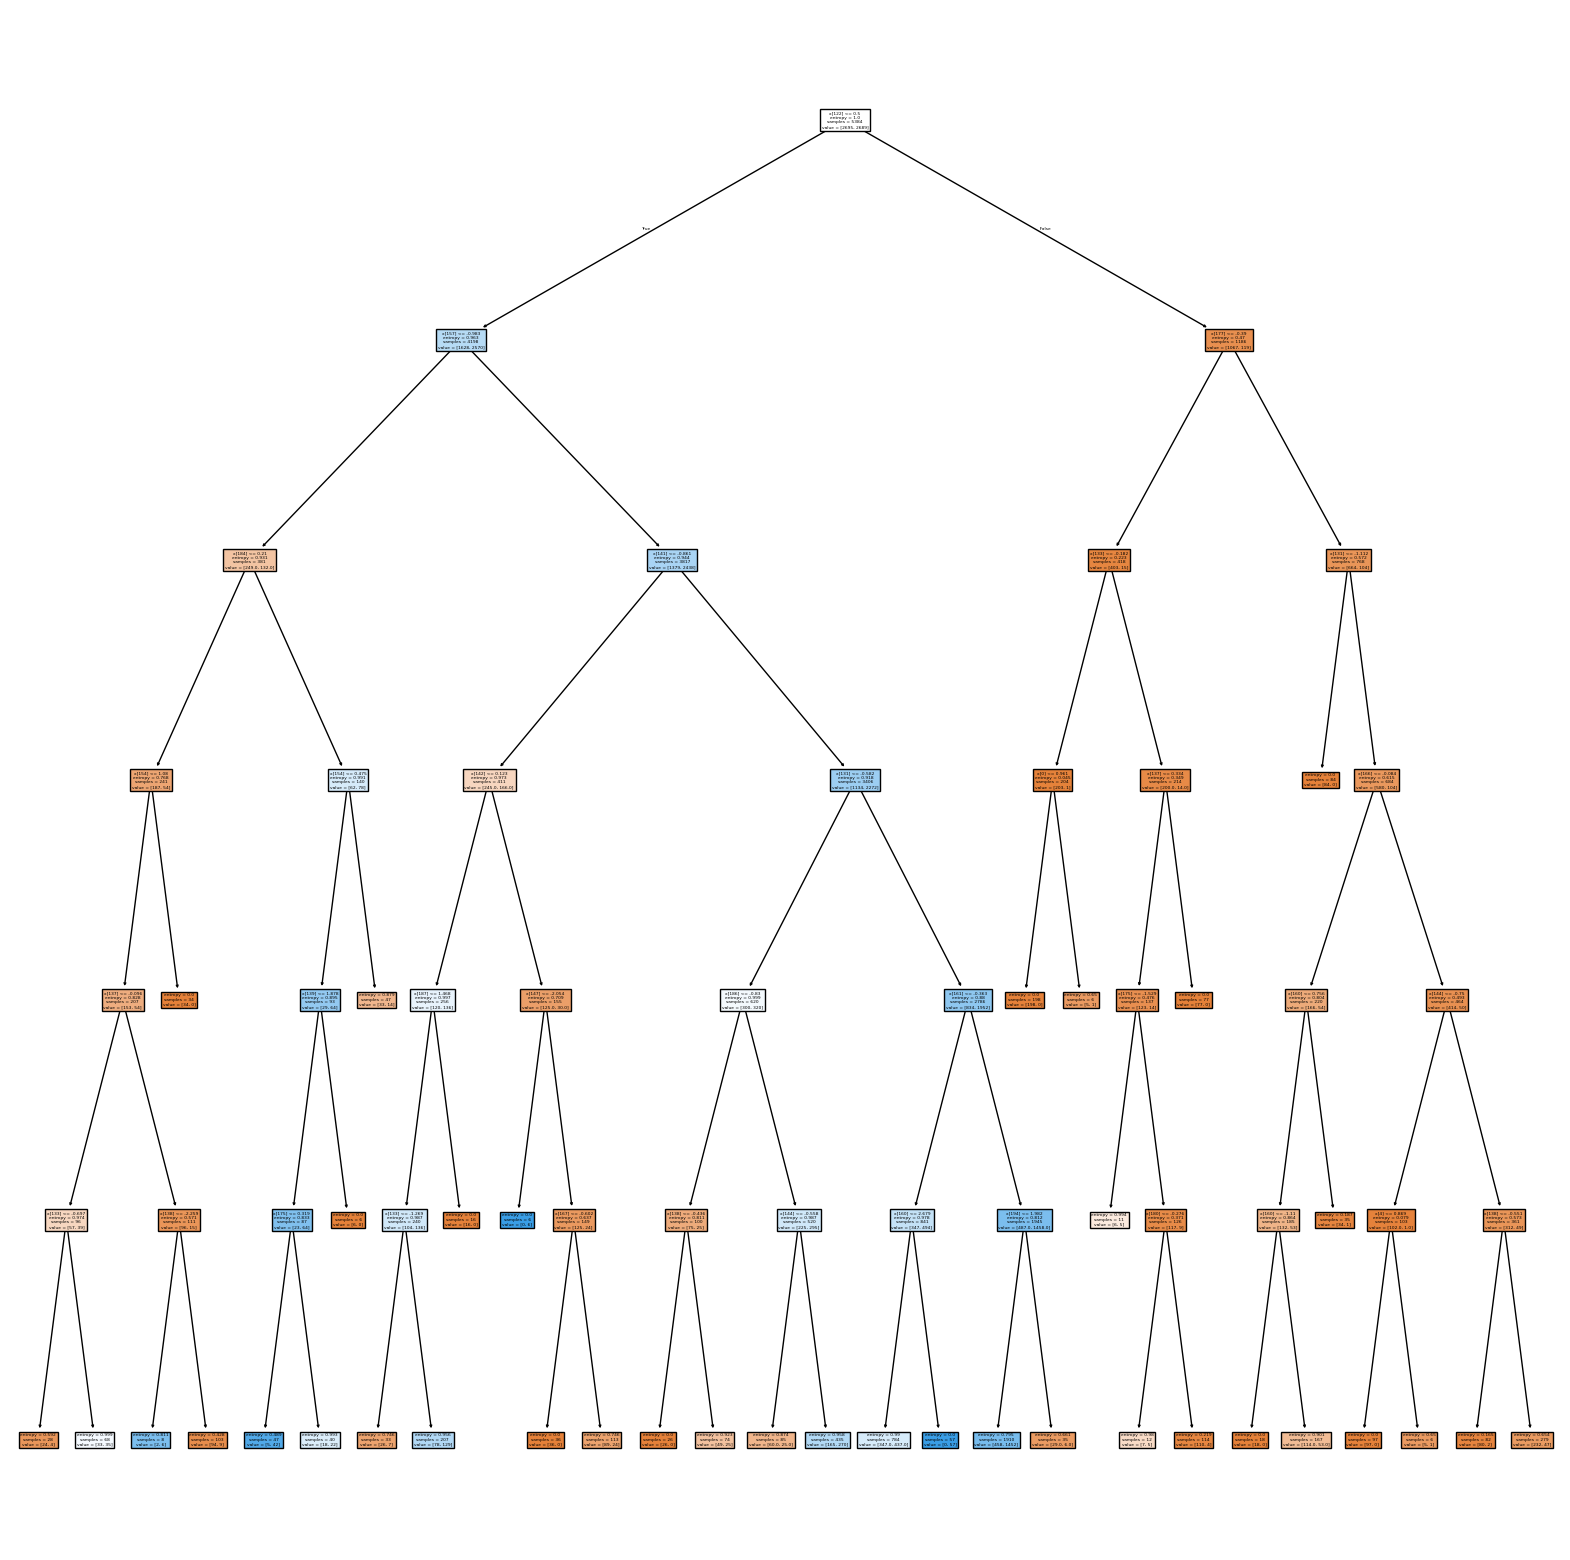

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(tree_CV.best_estimator_, filled=True) # , feature_names=X_train.columns
plt.show()

In [ ]:
# NO SE PUEDE METER EN EL ESTIMATOR DE UN BAGGING UN MODELO YA ENTRENADO, ESTE CÓDIGO ESTA MAL
# Ensamble con 30 árboles de decisión
# bagging_tree = BaggingClassifier(grid_tree, n_estimators = 30, max_samples=.5, max_features=.5, oob_score=True).fit(X_train , y_train)

# y_est = bagging_tree.predict(X_test)

# print("Accuracy",bagging_tree.score(X_test, y_test))
# print("MSE",mean_squared_error(y_est, y_test))
# bagging_tree.estimators_[0].best_estimator_

# Algoritmos avanzados: Emsemblers

## Bagging con tocones

In [ ]:
# Se busca el número de estimadores óptimo
# Tarda 2 min
tuned_parameters =[{
    'n_estimators':np.arange(1,21)
}]

grid_bagg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42)), tuned_parameters, cv=5).fit(X_train, y_train)

grid_bagg.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'n_estimators': 1}

In [ ]:
tocones = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=10, max_features=.5, max_samples=.5).fit(X_train, y_train)


y_est = tocones.predict(X_test)

tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall = recall_score(y_test, y_est)

print(f"Precision {tocones.score(X_test, y_test)}")
print(F"MSE {mean_squared_error(y_test, y_est)}")
print(f"True Negative Rate {tnr}")
print(f"Recall {recall}")


Precision 0.6813880126182965
MSE 0.3186119873817035
True Negative Rate 0.4072494669509595
Recall 0.9481327800829875


Resultado en una ejecución anterior  
0.6750788643533123  
0.3249211356466877  
True Negative Rate 0.4066390041493776  

### Matriz de confusión

Confusion matrix
[[191 278]
 [ 25 457]]
Normalized confusion matrix
[[0.40724947 0.59275053]
 [0.05186722 0.94813278]]


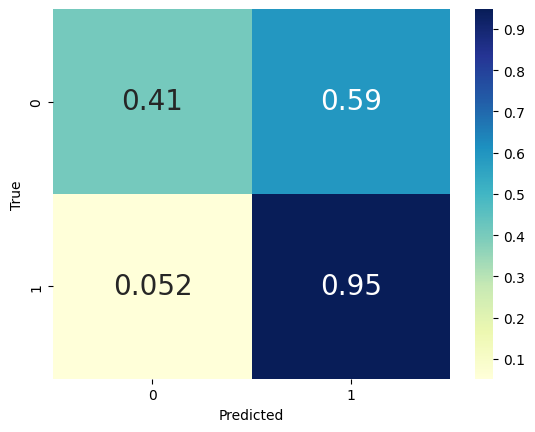

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis] # Aqui esta calculando el recall TPR y la especificidad TNR
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

## Random Forest

In [ ]:
# Cantidad de variables que se escogen en los nodos
print(X_train.shape[1])

variables = int((X_train.shape[1])**(0.5))
print(variables)

195
13


https://stackoverflow.com/questions/44683253/bagging-with-decision-stumps-in-sklearn-how-to-view-the-results

### Entrenamiento de RandomForestClassifier

In [ ]:
print(np.logspace(-3,-2,3))

print(np.linspace(0.01, 0.03, 3))

[0.001      0.00316228 0.01      ]
[0.01 0.02 0.03]


In [ ]:
# RandomState(42)
# Tarda 11 min sin especificar min_samples_leaf y min_samples_split
# Tarda x con min_samples_leaf y min_samples_split

# rang_split = np.logspace(-3,-2,3)
# rang_samples = np.linspace(0.01, 0.03, 3)
depth = np.arange(1,7)
n_estimators = np.arange(1,21)
features=['sqrt','log2']
criterion=['gini','entropy','log_loss']

tuned_parameters=[{
    'n_estimators': n_estimators,
    'max_depth':depth,
    'max_features':features,
    'criterion':criterion,
    # 'min_samples_leaf':rang_samples,
    # 'min_samples_split':rang_split
}]

r_forest = GridSearchCV(RandomForestClassifier(random_state=42), tuned_parameters).fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
r_forest.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 19}

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(r_forest, 'r_forest_model.pkl')

['r_forest_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
r_forest = joblib.load('r_forest_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = r_forest.predict(X_test)

MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = r_forest.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = r_forest.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = r_forest.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {r_forest.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión {r_forest.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 19}
Mejor precisión 0.7457285313396362
----- TRAIN -----
MSE : 0.19966567607726599
MAE : 0.19966567607726599
Accuracy: 0.8003343239227341
Specificity: 0.7128014842300556
Recall 0.8880624767571588
----- TEST -----
MSE : 0.2555205047318612
MAE : 0.2555205047318612
Accuracy: 0.7444794952681388
Specificity: 0.6716417910447762
Recall 0.8153526970954357


Parámetros óptimos {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 20}  
Mejor precisión0.7295692633744431  
----- TRAIN -----  
MSE : 0.24442793462109955  
MAE : 0.24442793462109955  
Accuracy: 0.7555720653789004  
Specificity: 0.7110294117647059  
Recall 0.801051051051051  
----- TEST -----  
MSE : 0.2996845425867508  
MAE : 0.2996845425867508  
Accuracy: 0.7003154574132492  
Specificity: 0.6981981981981982  
Recall 0.7021696252465484

Parámetros óptimos {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 20}  
Mejor precisión0.7295692633744431  
----- TRAIN -----  
MSE : 0.24442793462109955  
MAE : 0.24442793462109955  
Accuracy: 0.7555720653789004  
Specificity: 0.7110294117647059  
Recall 0.801051051051051  
----- TEST -----  
MSE : 0.2996845425867508  
MAE : 0.2996845425867508  
Accuracy: 0.7003154574132492  
Specificity: 0.6981981981981982  
Recall 0.7021696252465484  

SIN min_samples_leaf NI min_samples_split
Accuracy 0.7266035751840169  
Error cuadrático medio 0.2733964248159832  
Mejor estimador: RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=13,
                       random_state=42)  
Mejores parametros: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 13}  

TNR train 0.7578558225508318  
TNR test 0.6753812636165577

Resultado de una ejecución anterior  
Accuracy 0.7444794952681388  
Error cuadrático medio 0.2555205047318612  
Mejor estimador: RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=18)  
Mejor parametros: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 18}  

TNR train 0.8473821017452655  
TNR test 0.7367303609341825

### Matriz de confusión

Confusion matrix
[[315 154]
 [ 89 393]]
Normalized confusion matrix
[[0.67164179 0.32835821]
 [0.1846473  0.8153527 ]]


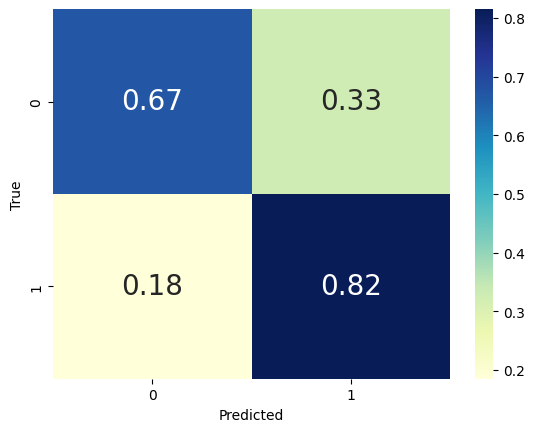

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis] # Aqui esta calculando el recall TPR y la especificidad TNR
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

0.7  - 0.3  
0.19 - 0.81

Ejecución anterior  
Confusion matrix  
[[310 134]  
 [114 393]]  
Normalized confusion matrix  
[[0.6981982  0.3018018 ]  
 [0.22485207 0.77514793]]  

### AUC

AUC:  0.8198957789593821


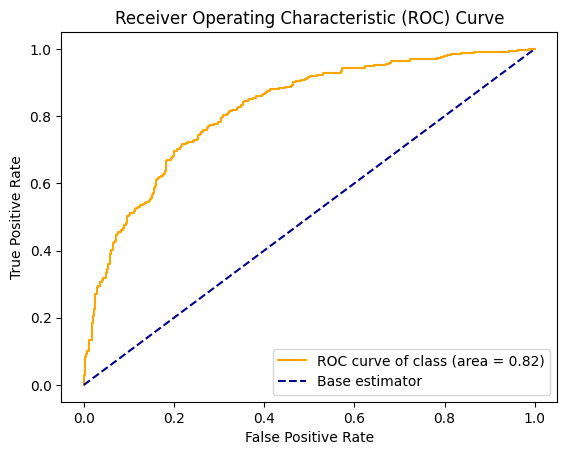

In [ ]:
# Ejecutame, me vas a necesitar
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,r_forest.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
# dtype = pd.CategoricalDtype(['False Positive','True prediction','False Negative'])
# test_data = X_test[["visitas", "compartir"]].assign(Prediction=pd.Categorical.from_codes(codes=(y_test.values-y_est+1).astype(int), dtype=dtype))

# plt.figure(figsize=(9,6))
# g = sns.scatterplot(x="visitas", y="compartir", hue='Prediction', palette='mako', data=test_data, s=100)

In [ ]:
# help(plot_tree)

## Bagging con DecisionTreeClassifer

### Entrenamiento de Bagging de árboles de decisión

In [ ]:
# Entrenar y evaluar

n_estimators = np.arange(1,21)


tuned_parameters=[{
    'n_estimators': n_estimators,

}]
bagging_tree = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth=5), max_features=0.5, max_samples=0.5), tuned_parameters).fit(X_train , y_train)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Se usa max_depth = 5 . Cuanto mayor sea la profundidad del arbol más sobre aprende el modelo.  
Limitar la profundidad se le llama poda, es una técnica para evitar que el modelo no generalice bien, es decir, que sobre aprenda.

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(bagging_tree, 'bagging_model.pkl')

['bagging_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
bagging_tree = joblib.load('bagging_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = bagging_tree.predict(X_test)

MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = bagging_tree.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = bagging_tree.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = bagging_tree.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {bagging_tree.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión {bagging_tree.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'n_estimators': 16}
Mejor precisión 0.7453573018815172
----- TRAIN -----
MSE : 0.20709509658246658
MAE : 0.20709509658246658
Accuracy: 0.7929049034175334
Specificity: 0.7261595547309833
Recall 0.8597991818519896
----- TEST -----
MSE : 0.24815983175604628
MAE : 0.24815983175604628
Accuracy: 0.7518401682439537
Specificity: 0.7078891257995735
Recall 0.7946058091286307


max_depth 5  
Accuracy 0.7192429022082019  
Error medio cuadrático 0.2807570977917981  
TNR 0.740990990990991  
RECALL 0.7001972386587771  

In [ ]:
# dtype = pd.CategoricalDtype(['False Positive','True prediction','False Negative'])
# test_data = X_test[["visitas", "compartir"]].assign(Prediction=pd.Categorical.from_codes(codes=(y_test.values-y_est+1).astype(int), dtype=dtype))

# plt.figure(figsize=(9,6))
# g = sns.scatterplot(x="visitas", y="compartir", hue='Prediction', palette='mako', data=test_data, s=100)

### Matriz de confusión

In [ ]:
# test_data

Confusion matrix
[[332 137]
 [ 99 383]]
Normalized confusion matrix
[[0.70788913 0.29211087]
 [0.20539419 0.79460581]]


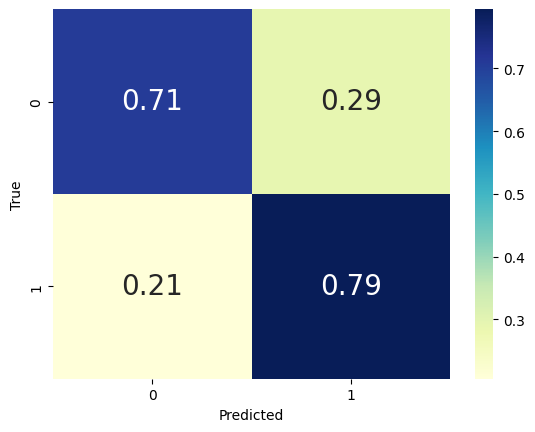

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis] # Aqui esta calculando el recall TPR y la especificidad TNR
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.8314702421502445


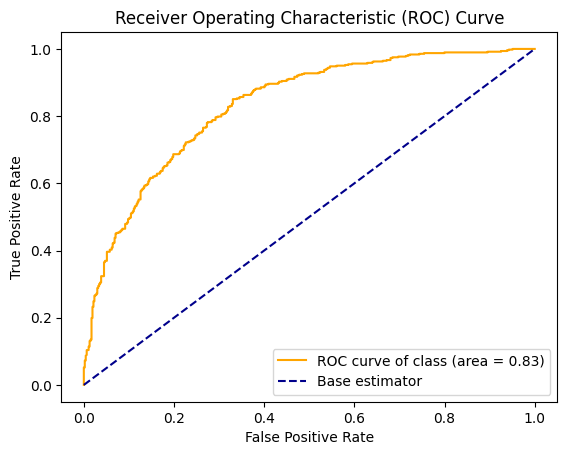

In [ ]:
# Ejecutame, me vas a necesitar
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,bagging_tree.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
# n_nodes = bagging_tree.estimators_[1].tree_.node_count
# children_left = bagging_tree.estimators_[1].tree_.children_left
# children_right = bagging_tree.estimators_[1].tree_.children_right
# feature = bagging_tree.estimators_[1].tree_.feature
# threshold = bagging_tree.estimators_[1].tree_.threshold
# values = bagging_tree.estimators_[1].tree_.value

# # print(n_nodes, children_left, children_right, feature, threshold, values, sep='\n\n')
# node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
# is_leaves = np.zeros(shape=n_nodes, dtype=bool)
# stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
# while len(stack) > 0:
#     # `pop` ensures each node is only visited once
#     node_id, depth = stack.pop()
#     node_depth[node_id] = depth

#     # If the left and right child of a node is not the same we have a split
#     # node
#     is_split_node = children_left[node_id] != children_right[node_id]
#     # If a split node, append left and right children and depth to `stack`
#     # so we can loop through them
#     if is_split_node:
#         stack.append((children_left[node_id], depth + 1))
#         stack.append((children_right[node_id], depth + 1))
#     else:
#         is_leaves[node_id] = True

# print(
#     "The binary tree structure has {n} nodes and has "
#     "the following tree structure:\n".format(n=n_nodes)
# )
# for i in range(n_nodes):
#     if is_leaves[i]:
#         print(
#             "{space}node={node} is a leaf node with value={value}.".format(
#                 space=node_depth[i] * "\t", node=i, value=values[i]
#             )
#         )
#     else:
#         print(
#             "{space}node={node} is a split node with value={value}: "
#             "go to node {left} if X[:, {feature}] <= {threshold} "
#             "else to node {right}.".format(
#                 space=node_depth[i] * "\t",
#                 node=i,
#                 left=children_left[i],
#                 feature=feature[i],
#                 threshold=threshold[i],
#                 right=children_right[i],
#                 value=values[i],
#             )
#         )

In [ ]:
# from sklearn import tree

# for col in range(len(bagging_tree.estimators_)):
#     fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(20,20)) # estimators_[0]
#     tree.plot_tree(bagging_tree.estimators_[col],
#                     feature_names = X_train.columns,
#                     filled=True)
#     plt.show()

## Emsembler secuenciales

## Clasificación con RNN solo con textos
Red neuronal recurrente

[Información sacada de la documentación](https://www.tensorflow.org/tutorials/keras/text_classification?hl=es-419#train_the_model)

https://www.tensorflow.org/text/tutorials/text_classification_rnn?hl=es-419#train_the_model

In [ ]:
RandomState = 42

### Entrenamiento

In [543]:
embedding_dim =32

In [559]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        max_features_textos,
        embedding_dim,
        input_length=sequence_length_textos,
        # Use masking to handle the variable sequence lengths
        # mask_zero=True
        ),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),  #, kernel_regularizer=keras.regularizers.l2(0.001)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), #from_logits=True
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
]

history = model.fit(X_train_texto, y_train, epochs=20,
                    validation_data=(X_test_texto, y_test),
                    callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - FalsePositives: 499.4907 - TrueNegatives: 807.9069 - accuracy: 0.5509 - loss: 0.6766 - val_FalsePositives: 149.0000 - val_TrueNegatives: 311.0000 - val_accuracy: 0.7772 - val_loss: 0.6712 - learning_rate: 1.0000e-04
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - FalsePositives: 218.5093 - TrueNegatives: 1088.8882 - accuracy: 0.8318 - loss: 0.3930 - val_FalsePositives: 63.0000 - val_TrueNegatives: 397.0000 - val_accuracy: 0.8847 - val_loss: 0.4853 - learning_rate: 1.0000e-04
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - FalsePositives: 80.5342 - TrueNegatives: 1226.8634 - accuracy: 0.9313 - loss: 0.1744 - val_FalsePositives: 33.0000 - val_TrueNegatives: 427.0000 - val_accuracy: 0.8825 - val_loss: 0.2813 - learning_rate: 1.0000e-04
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - FalsePositives: 25.1801 - TrueNegatives: 1282.2174 - accuracy: 0.9760 - loss: 0.0804 - val_FalsePositives: 29.0000 - val_TrueNegatives: 431

### Guardado y carga del modelo

In [565]:
# --------------- Guardar modelo ----------------
model.save('rnn_textos_model.h5')

In [ ]:
# --------------- Cargar modelo ----------------
model = tf.keras.models.load_model('rnn_textos_model.h5')

### Predicción y evaluación

In [561]:
accuracy_train = model.evaluate(X_train_texto, y_train)
accuracy = model.evaluate(X_test_texto, y_test)
# lista_precisiones.append(accuracy[1])

print(accuracy_train[1], accuracy[1])

160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - FalsePositives: 10.8012 - TrueNegatives: 1303.2484 - accuracy: 0.9896 - loss: 0.0375
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - FalsePositives: 16.8000 - TrueNegatives: 237.7667 - accuracy: 0.9070 - loss: 0.2531
0.9909945130348206 0.9135255217552185


In [562]:
y_est = np.round(model.predict(X_test_texto))
y_est_train = np.round(model.predict(X_train_texto))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


In [563]:
# TNR = history.history['true_negatives'][0] / (history.history['false_positives'][0] + history.history['false_positives'][0]) esto no funciona

from sklearn.metrics import recall_score

TNR = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
TNR_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(TNR)

recall = recall_score(y_test, y_est)
lista_recall.append(recall)
recall_train = recall_score(y_train, y_est_train)

print("TEST",TNR)
print("TRAIN",TNR_train)
print("-----------")



TEST 0.9369565217391305
TRAIN 0.9922027290448343
-----------


### Matriz confusión

Confusion matrix
[[431  29]
 [ 49 393]]
Normalized confusion matrix
[[0.93695652 0.06304348]
 [0.11085973 0.88914027]]


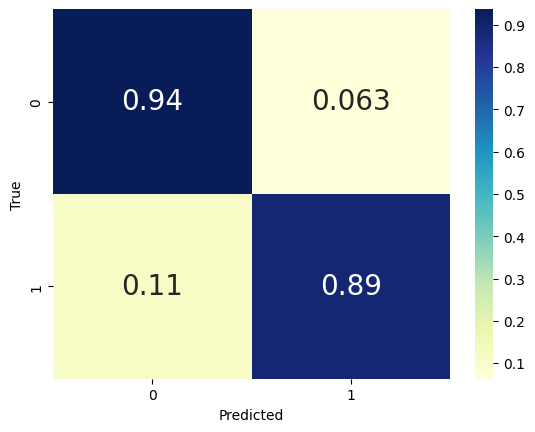

In [564]:
import seaborn as sns

# Matriz de confusión
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
AUC:  0.9678978949439307


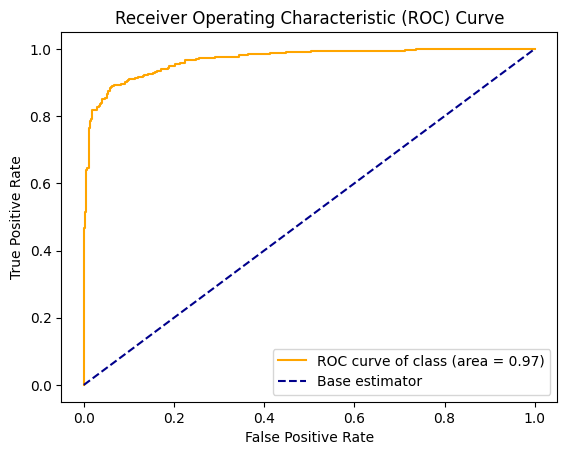

In [566]:
# Gráfico de área bajo la curva AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_texto))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

## Clasificación con RNN de textos y métricas

https://www.tensorflow.org/text/tutorials/text_classification_rnn?hl=es-419#train_the_model

### Entrenamiento
Sin usar Sequential

In [567]:
embedding_dim = 32

# Capas de entrada
input_vectorized = tf.keras.layers.Input(shape=(sequence_length_textos,)) # Entrada para el embedding
input_additional = tf.keras.layers.Input(shape=(X_train.shape[1],)) # Esta es la entrada de las métricas

# Embedding y LSTM
embedding = tf.keras.layers.Embedding(
    max_features_textos,
    embedding_dim,
    # mask_zero=True # Se usa mask_zero=True para manejar las secuencias de longitud variables. Para ignorar los ceros de padding en la pérdida
)(input_vectorized)

dropout_1 =  tf.keras.layers.Dropout(0.5)(embedding)
lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(dropout_1)

# Capa dense con las métricas.
dense_additional = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(input_additional)

# Se concatenan las salidas
concatenated = tf.keras.layers.Concatenate()([lstm, dense_additional])
batch_norm1 = tf.keras.layers.BatchNormalization()(concatenated)

dropout_2 =  tf.keras.layers.Dropout(0.5)(batch_norm1)
dense = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(dropout_2)
batch_norm2 = tf.keras.layers.BatchNormalization()(dense)
dropout_3 =  tf.keras.layers.Dropout(0.5)(batch_norm2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_3)


model = tf.keras.Model(inputs=[input_vectorized, input_additional], outputs=output)


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),  #BinaryFocalCrossentropy()
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives'])


callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
]

In [1]:
tf.random.set_seed(42)
np.random.seed(42)


history = model.fit(
    [X_train_texto, X_train_metricas], # X_train son los titulos y textos
    y_train,
    epochs=50,
    validation_data=([X_test_texto, X_test_metricas], y_test),
    callbacks=callbacks
)

NameError: name 'tf' is not defined

### Guardado y carga del modelo

In [ ]:
# print(help(model.save))

In [ ]:
# --------------- Guardar modelo ----------------
model.save('rnn_textos_y_metricas_model.h5')


In [ ]:
# --------------- Cargar modelo ----------------
model = tf.keras.models.load_model('rnn_textos_y_metricas_model.h5')

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_est)

### Evaluación y predicción

In [ ]:
# Devuelve la precisión de train en cada epoch
print(history.history['accuracy'])

In [ ]:
model.evaluate([X_train_texto, X_train], y_train)
model.evaluate([X_test_texto, X_test], y_test, return_dict=True)

78  
76

Prueba con embedding_dim = 32  dropout rate 0.2
loss: 0.4703 - accuracy: 0.8156  
loss: 0.6077 - accuracy: 0.7413  

Prueba con embedding_dim = 16  
169/169 [==============================] - 34s 185ms/step - loss: 0.4954 - accuracy: 0.7942  
30/30 [==============================] - 6s 189ms/step - loss: 0.5307 - accuracy: 0.7792  
[0.5306569337844849, 0.7791798114776611]  

In [ ]:
y_est = np.round(model.predict([X_test_texto, X_test]))
y_est_train = np.round(model.predict([X_train_texto, X_train]))


# Se obtiene el True Negative Rate o cantidad de noticias falsas que el modelo ha predicho como falsas de entre todos los casos en los que las noticias son falsas.

# TNR = history.history['true_negatives'][0] / (history.history['false_positives'][0] + history.history['false_positives'][0]) esto no funciona

from sklearn.metrics import recall_score

TNR = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
TNR_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR

print("TRAIN",TNR_train)
print("TEST",TNR)

77  
72

### Matriz de confusion  
Con los valores de test

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

0.81 - 0.19  
0.28 - 0.72

### AUC

In [ ]:
# Gráfico de área bajo la curva AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict([X_test_texto, X_test]))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

# Modelo encoder final  
No es un transformer en su totalidad, se usa la parte de encoder (capa de atención, add & norm más capa feed forward otra add & norm), capa de atención cruzada y feedforward junto con una capa final dense y finalmente una softmax o sigmoide (para una clasificación binaria sería suficiente usar una sigmoide)


<img width=400 src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png"/>

## Importaciones

## Definición de las capas del encoder  
con clases personalizadas

In [ ]:
# Parámetros
embedding_dim = 16

print(f"max_features {max_features}") # Las x palabras con mas frecuencia en los textos
print(f"sequence_length {sequence_length}") # Longitud de los textos
print(f"embedding_dim {embedding_dim}")

In [ ]:
# -------- Positional encoding -----------
# genera el vector posicional
def positional_encoding(length, depth):
  depth = depth/2
  positions = np.arange(length)[:, np.newaxis]   #(pos, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth #(1, depth)

  angles_rates = 1/(10000**depths) #(1, depth)
  angles_rads = positions * angles_rates # (pos, depth)

  pos_encoding = np.concatenate([np.sin(angles_rads), np.cos(angles_rads)], axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

# Test

pos_encoding = positional_encoding(length=X_train[:10].shape[0] , depth=sequence_length)

# Check the shape.
print(pos_encoding.shape)


class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=sequence_length , depth=d_model)
  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)
  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    x = x * tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x

# Test
p_embedding = PositionalEmbedding(max_features, embedding_dim)(X_train[:10])
print(type(p_embedding))
print(p_embedding.shape)


In [ ]:
# -------- Capa base de atención -----------
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.add = tf.keras.layers.Add()
    self.layernorm = tf.keras.layers.LayerNormalization()


# -------- Capa de atención cruzada -----------
# la que une el encoder con el decoder
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(query=x, key=context, value=context, return_attention_scores=True)
    self.last_attn_scores = attn_scores
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

# Test
# sample_ca = CrossAttention(num_heads=2, key_dim=512)

# print(p_embedding.shape)
# print(sample_ca(X_train, X_train).shape)

In [ ]:
# -------- Capa de atención global -----------
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(query=x, key=x, value=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

# Test
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=embedding_dim)

print(p_embedding.shape)
print(sample_gsa(p_embedding).shape)

In [ ]:
# -------- Capa feedforward -----------
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ]
    )
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()
  def call(self, x):
    seq_result = self.seq(x)
    x = self.add([x, seq_result])
    x = self.layer_norm(x)
    return x

# Test
sample_ffn = FeedForward(embedding_dim, sequence_length)

print(p_embedding.shape)
print(sample_ffn(p_embedding).shape)

In [ ]:
# -------- Capa Encoder -----------
# class EncoderLayer(tf.keras.layers.Layer):
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, *, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()
    self.self_attention = GlobalSelfAttention(num_heads=num_heads, key_dim=d_model, dropout=dropout_rate)
    self.ffn = FeedForward(d_model, dff)
  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

# Test
sample_encoder_layer = EncoderLayer(d_model=embedding_dim, num_heads=8, dff=sequence_length)

print(p_embedding.shape)
print(sample_encoder_layer(p_embedding).shape)

In [ ]:
# -------- Encoder completo -----------
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size, dropout_rate=0.2):
    super().__init__()
    self.d_model = d_model
    self.num_layers = num_layers
    self.pos_embedding = PositionalEmbedding(vocab_size, d_model)
    self.enc_layers = [
        EncoderLayer(d_model=d_model, num_heads=num_heads, dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)
    ]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
  def call(self, x):
    x = self.pos_embedding(x)
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)
    return x

# Test
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=embedding_dim,
                         num_heads=8,
                         dff=sequence_length,
                         vocab_size=max_features)

sample_encoder_output = sample_encoder(X_train[:10], training=False)

# Print the shape.
print(X_train[:10].shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

## Arquitectura y entrenamiento

In [ ]:
################# Prueba solo textos #################
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential()
model.add(Encoder(
    num_layers=4,
    d_model=embedding_dim,
    num_heads=8,
    dff=sequence_length,
    vocab_size=max_features))
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.GlobalAveragePooling1D()) # Para reducir dimensionalidad del vector resultante del encoder
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-2),
              metrics='accuracy')


In [ ]:
################# Prueba textos y métricas #################

embedding_dim = 32

# Capas de entrada
input_vectorized = tf.keras.layers.Input(shape=(sequence_length_textos,)) # Entrada de los textos tokenizados
input_additional = tf.keras.layers.Input(shape=(X_train.shape[1],)) # Esta es la entrada de las métricas

# Enconder
encoder_output = Encoder(
    num_layers=4,
    d_model=embedding_dim,
    num_heads=8,
    dff=sequence_length,
    vocab_size=max_features)(input_vectorized)

flatten_encoder_output = tf.keras.layers.Flatten()(encoder_output)

# Capa dense con las métricas.
dense_additional = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(input_additional)

# Se concatenan las salidas
concatenated = tf.keras.layers.Concatenate()([flatten_encoder_output, dense_additional])

dropout_2 =  tf.keras.layers.Dropout(0.5)(concatenated)
dense = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(dropout_2)
batch_norm = tf.keras.layers.BatchNormalization()(dense)
dropout_3 =  tf.keras.layers.Dropout(0.5)(batch_norm)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_3)


model = tf.keras.Model(inputs=[input_vectorized, input_additional], outputs=output)


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),  #BinaryFocalCrossentropy()
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives'])


callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5384, 133)
(5384, 1)
(951, 133)
(951, 1)


In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
]

# X_train_prueba = X_train[:1000]
# y_train_prueba = y_train[:1000]
# X_test_prueba =X_test[:1000]
# y_test_prueba = y_test[:1000]

history = model.fit(
    X_train_prueba,
    y_train_prueba,
    epochs=30,
    validation_data=(X_test,y_test),
    callbacks=callbacks
)

## Guardado y carga del modelo

In [ ]:
# --------------- Guardar modelo ----------------
model.save('encoder_model.h5')

In [ ]:
model = tf.keras.models.load_model('encoder_model.h5')
model.summary()

## Predicción y evaluación

In [ ]:
# print([item for item in dir(model) if not item.startswith('_')])

In [ ]:
history.history['accuracy']

In [ ]:
model.evaluate(X_train_prueba, y_train_prueba)
model.evaluate(X_test_prueba, y_test_prueba)

# model.evaluate(X_train, y_train)
# model.evaluate(X_test, y_test)

In [ ]:
y_est = np.round(model.predict(X_test))
y_est_train = np.round(model.predict(X_train))

In [ ]:
TNR = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
TNR_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR

print("TRAIN",TNR)
print("TEST",TNR_train)

## Matriz de confusión

In [ ]:
import seaborn as sns

# Matriz de confusión
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

## AUC

In [ ]:
# Gráfico de área bajo la curva AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict([X_test_texto, X_test]))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

# Tabla comparación de modelos y conclusiones

In [ ]:
# Crear un diccionario con todos los objetos
tabla_comparaciones = {
    'modelos':['Regresión logística', 'KNNeighbours', 'Support Vector Machine', 'Árbol de decisión', 'RandomRorest','Bagging de árboles de decisión', 'Red neuronal recurrente (solo textos)', 'Red neuronal recurrente (todos los datos)', 'Red neuronal con Encoder'],
    'lista_precisiones':lista_precisiones,
    'lista_tnr':lista_tnr,
    'lista_recall':lista_recall
}

# Guardar el diccionario
with open('tabla_comparaciones.pkl', 'wb') as f:
    joblib.dump(tabla_comparaciones, f, compress=9) # Se usa compress para que comprima los datos lo que se traduce en un mayor tiempo de carga pero libera mucho espacio, 9 es el mayor nivel de compresion.

In [ ]:
# Cargar el diccionario de preprocesamiento
with open('tabla_comparaciones.pkl', 'rb') as f:
    tabla_comparaciones = joblib.load(f)

# Esructura de los datos
print(f"Claves del diccionario datos_preprocesados: {tabla_comparaciones.keys()}\n")

# Recuperar los objetos


Claves del diccionario datos_preprocesados: dict_keys(['modelos', 'precision', 'tnr', 'recall'])



In [ ]:
df_comparaciones = pd.DataFrame(tabla_comparaciones, columns=tabla_comparaciones.keys())
df_comparaciones

,modelos,precision,tnr,recall
0,Regresión logística,0.726604,0.614072,0.836100
1,KNNeighbours,0.668770,0.456290,0.875519
2,Support Vector Machine,0.726604,0.590618,0.858921
3,Árbol de decisión,0.726604,0.567164,0.881743
4,RandomRorest,0.744479,0.671642,0.815353
5,Bagging de árboles de decisión,0.751840,0.707889,0.794606


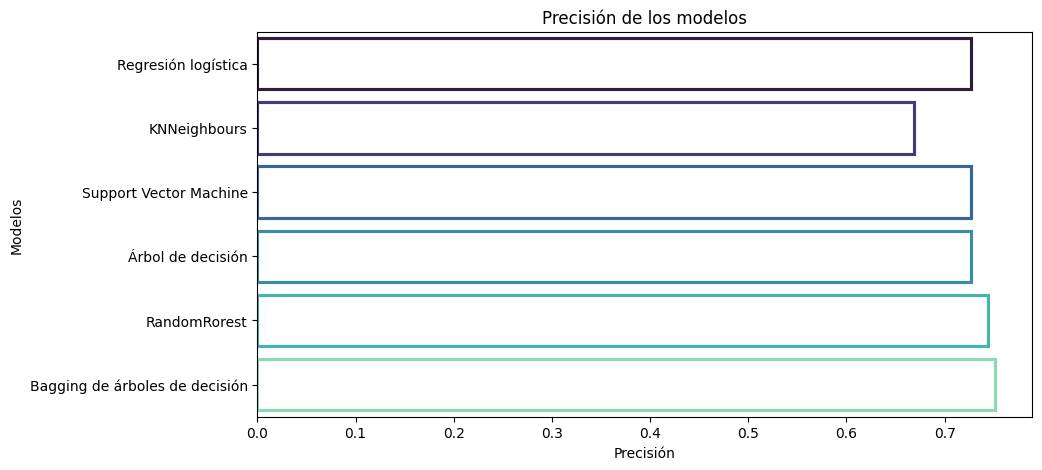

In [ ]:
plt.figure(figsize=(10,5))

figura = sns.barplot(x='precision', y= 'modelos', data=df_comparaciones, palette='mako', hue='modelos', legend=False, saturation=0.5, fill =False)


plt.ylabel('Modelos')
plt.xlabel('Precisión')
plt.title('Precisión de los modelos')

plt.show;

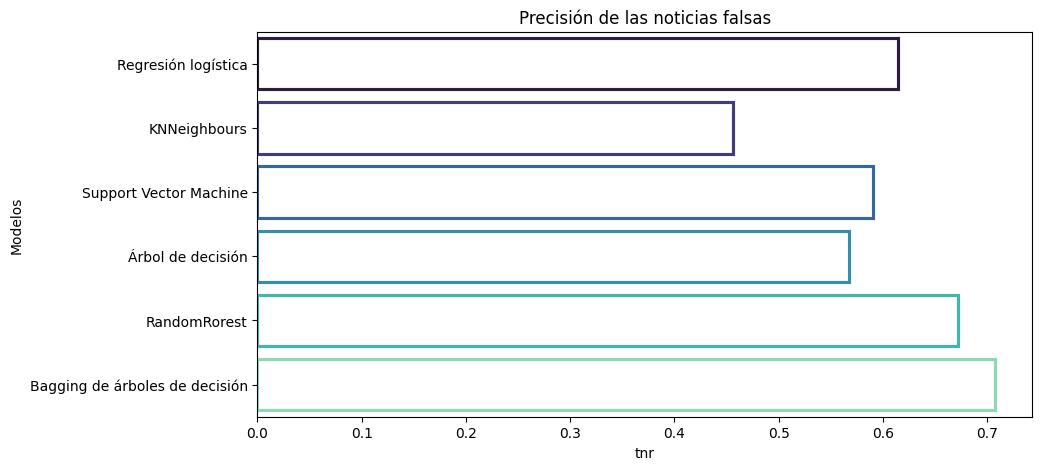

In [ ]:
plt.figure(figsize=(10,5))

figura = sns.barplot(x='tnr', y= 'modelos', data=df_comparaciones, palette='mako', hue='modelos', legend=False, saturation=0.5, fill =False)


plt.ylabel('Modelos')
plt.xlabel('tnr')
plt.title('Precisión de las noticias falsas')

plt.show;